# Time series clustering

`tslearn` provides a `clustering` package that provides a kernel $k$-means implementation based on Global Alignment kernel.

In [1]:
%pylab inline
import numpy
import sys
sys.path.append("../../..")

from tslearn.clustering import GlobalAlignmentKernelKMeans
from tslearn.metrics import sigma_gak, cdist_gak
from tslearn.generators import random_walk_blobs

numpy.random.seed(0)
X, y = random_walk_blobs(n_ts_per_blob=50, sz=128, d=1, n_blobs=3)

Populating the interactive namespace from numpy and matplotlib


First, as `GlobalAlignmentKernelKMeans` relies on Global Alignment kernel, one needs to select an appropriate value for the bandwidth parameter $\sigma$ to be used in the kernel. 
This can be done using the `sigma_gak` function from `tslearn.metrics` module:

In [2]:
sigma = sigma_gak(X)
#
#pylab.figure(figsize=(15, 5))
#for i, sigma in enumerate([sigma / 100, sigma, 100 * sigma]):
#    pylab.subplot(1, 3, i + 1)
#    pylab.imshow(cdist_gak(X, sigma=sigma))
#    pylab.title("$\sigma = %.2f$" % sigma)
#pylab.show();

As seen above, the value selected by `sigma_gak` (which corresponds to the middle Gram matrix) tends to pick reasonable values for the bandwidth parameter.

Now, we can fit a kernel $k$-means and observe the resulting clustering of the data.

Init 1
172.404 --> 61.925 --> 2.004 --> 2.004 --> 
Init 2
160.360 --> Resumed because of empty cluster
Init 3
164.162 --> Resumed because of empty cluster
Init 4
177.768 --> 2.004 --> 2.004 --> 
Init 5
156.332 --> 2.004 --> 2.004 --> 
Init 6
175.501 --> 2.004 --> 2.004 --> 
Init 7
176.443 --> 2.004 --> 2.004 --> 
Init 8
160.259 --> 2.004 --> 2.004 --> 
Init 9
168.658 --> Resumed because of empty cluster
Init 10
159.849 --> 2.004 --> 2.004 --> 


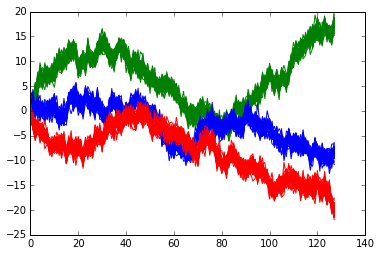

In [3]:
gak_km = GlobalAlignmentKernelKMeans(n_clusters=3, sigma=sigma, n_init=10)
y_pred = gak_km.fit_predict(X)

if gak_km.X_fit_ is not None:
    own_colors = ["r", "g", "b"]
    pylab.figure()
    for xx, yy in zip(X, y_pred):
        pylab.plot(numpy.arange(128), xx, own_colors[yy] + "-")
    pylab.show()

In practice, for this very simple dataset in which there is no time delay, standard $k$-means could do the job. Unfortunately, `KMeans` implementation from `sklearn` would not accept 3d arrays as inputs. This is why `tslearn` provides a convenient class named `TimeSeriesKMeans` that does the reshaping job for you:

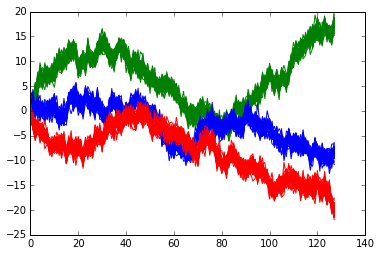

In [4]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3)
y_pred = km.fit_predict(X)

own_colors = ["r", "g", "b"]
pylab.figure()
for xx, yy in zip(X, y_pred):
    pylab.plot(numpy.arange(128), xx, own_colors[yy] + "-")
pylab.show()